## sigmoid function

In [3]:
import numpy as np


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


print(sigmoid(np.array([-1, 0, 1])))

[0.26894142 0.5        0.73105858]


## tanh function

In [4]:
def tanh(x):
    numerator = 1 - np.exp(-2 * x)
    denominator = 1 + np.exp(-2 * x)
    return numerator / denominator


print(tanh(np.array([-1, 0, 1])))

[-0.76159416  0.          0.76159416]


## Rectified Linear Unit function

In [8]:
def RelU(x):
    if x < 0:
        return 0
    else:
        return x


print(RelU(1))

1


## Leaky ReLU function

In [9]:
def leakyReLU(x, alpha=0.01):
    if x < 0:
        return alpha * x
    else:
        return x


print(leakyReLU(-1))

-0.01


## Exponential Linear Unit function

In [12]:
def ELU(x, alpha=1):
    if x < 0:
        return alpha * (np.exp(x) - 1)
    else:
        return x


print(ELU(-1))

-0.6321205588285577


## Swish function

In [13]:
def swish(x, beta):
    return 2 * x * sigmoid(beta * x)


print(swish(1, 1))

1.4621171572600098


## Softmax function

In [14]:
def softmax(x):
    return np.exp(x) / np.exp(x).sum(axis=0)


print(softmax(np.array([1, 2, 3])))

[0.09003057 0.24472847 0.66524096]


## Forward Propagation in ANN

In [16]:
Wxh = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
bh = np.array([1, 1, 1])
Why = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
by = np.array([1, 1, 1])

def forward_prop(X):
    z1 = np.dot(X, Wxh) + bh
    a1 = sigmoid(z1)
    z2 = np.dot(a1, Why) + by
    y_hat = sigmoid(z2)

    return y_hat


print(forward_prop(np.array([1, 2, 3])))

[0.99999774 0.99999989 0.99999999]


## Backward Propagation in ANN

In [26]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))


y = np.array([1, 2, 3])
X = np.array([1, 2, 3])
alpha = 0.01


def backward_prop(y_hat, z1, a1, z2, Wxh, Why):
    delta2 = np.multiply(-(y - y_hat), sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)

    delta1 = np.dot(delta2, Why.T) * sigmoid_derivative(z1)
    dJ_dWxh = np.dot(X.T, delta1)

    Wxh = Wxh - alpha * dJ_dWxh
    Why = Why - alpha * dJ_dWhy

    return Wxh, Why


print(
    backward_prop(
        np.array([1, 2, 3]),
        np.array([1, 2, 3]),
        np.array([1, 2, 3]),
        np.array([1, 2, 3]),
        np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
        np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
    )
)

(array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]]), array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]]))


## Building a Neural Network from Scratch

Text(0, 0.5, 'Cost')

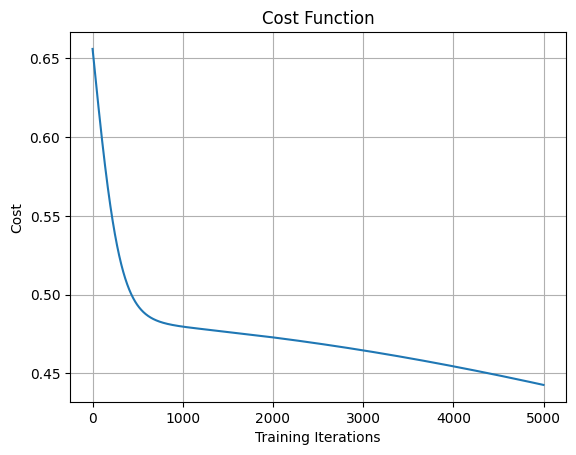

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = np.array([[0,1], [1,0], [1,1], [0,0]])
y = np.array([[1], [1], [0], [0]])

num_input = 2
num_hidden = 5
num_output = 1

Wxh = np.random.randn(num_input, num_hidden)
bh = np.zeros((1, num_hidden))

Why = np.random.randn(num_hidden, num_output)
by = np.zeros((1, num_output))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))
  
def sigmoid_derivative(z):
    return np.exp(-z) / (1 + np.exp(-z))**2
  
def forward_prop(X, Wxh, Why):
    z1 = np.dot(X, Wxh) + bh
    a1 = sigmoid(z1)
    z2 = np.dot(a1, Why) + by
    y_hat = sigmoid(z2)
    
    return z1, a1, z2, y_hat
  
def backward_prop(y_hat, z1, a1, z2):
    delta2 = np.multiply(-(y - y_hat), sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2, Why.T) * sigmoid_derivative(z1)
    dJ_dWxh = np.dot(X.T, delta1)
    
    return dJ_dWxh, dJ_dWhy
  
def cost_function(y, y_hat):
    J = 0.5 * sum((y - y_hat)**2)
    return J

alpha = 0.01
num_iterations = 5000

cost = []

for i in range(num_iterations):
    z1, a1, z2, y_hat = forward_prop(X, Wxh, Why)
    dJ_dWxh, dJ_dWhy = backward_prop(y_hat, z1, a1, z2)
    
    # update weights
    Wxh = Wxh - alpha * dJ_dWxh
    Why = Why - alpha * dJ_dWhy
    
    # compute cost
    c = cost_function(y, y_hat)
    
    cost.append(c)
    
plt.grid()
plt.plot(range(num_iterations), cost)
plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')